In [5]:
import os
os.chdir('C:\\Users\\Administrator\\Desktop\\Data')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data=pd.read_csv('Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [6]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


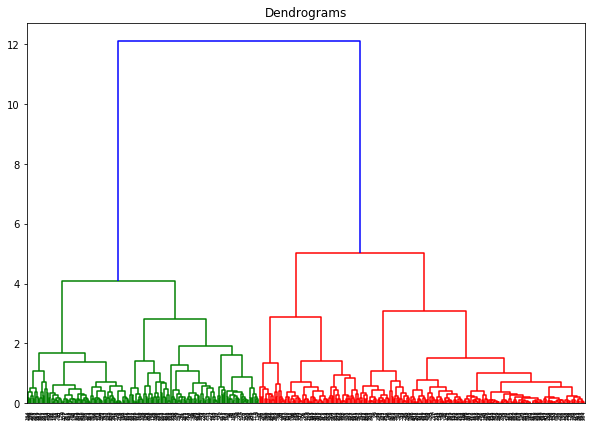

In [7]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

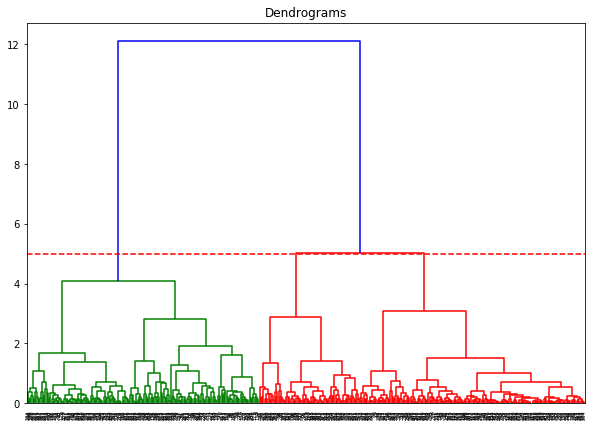

In [9]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=5, color='r', linestyle='--')

In [16]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0,
       0, 1, 0, 1, 2, 1, 2, 2, 0, 1, 2, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       2, 1, 1, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 2, 1, 1, 1, 1, 0, 1, 2, 1, 2, 1, 0, 1, 1, 2, 1, 0, 1, 2, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 2, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 2, 2, 0, 0, 0, 2, 1, 1, 0, 1, 2, 2, 0,
       2, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 2,
       1, 0, 2, 2, 1, 1, 1, 2, 0, 2, 2, 0, 1, 0, 1, 0, 1, 1, 1, 1, 2, 1,
       1, 1, 0, 0, 1, 1, 1, 2, 2, 0, 2, 1, 0, 1, 1, 2, 1, 1, 1, 2, 1, 0,
       0, 0, 0, 1, 0, 1, 2, 0, 0, 1, 0, 0, 1, 2, 2, 1, 0, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 0, 2, 0, 0, 1, 1, 1, 1, 0, 0, 1,

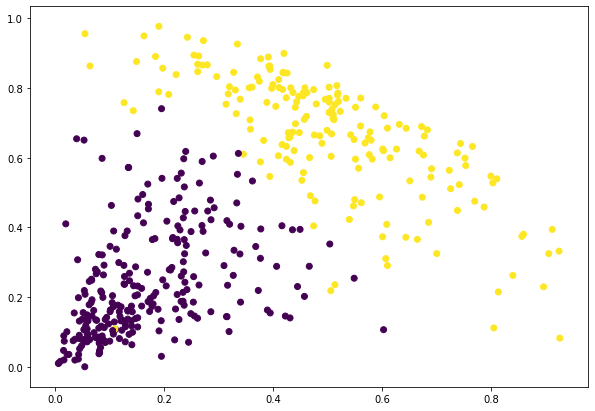

In [11]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_) 

In [14]:
cluster.n_leaves_

440

In [ ]:
## Kmeans

In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [21]:
len(kmeans.cluster_centers_)

3

In [22]:
len(kmeans.cluster_centers_[0])

8

In [23]:
data_scaled.shape

(440, 8)

In [24]:
kmeans.cluster_centers_

array([[1.43337758e-04, 3.56530913e-04, 5.75088384e-01, 2.33244986e-01,
        2.79251677e-01, 6.25424671e-01, 5.37477011e-02, 1.09051837e-01],
       [8.55363225e-05, 2.07121647e-04, 9.02462221e-01, 1.79159610e-01,
        2.29112659e-01, 1.49695047e-01, 4.90473056e-02, 7.44549202e-02],
       [1.18462318e-04, 2.20463662e-04, 2.54118015e-01, 4.86060633e-01,
        6.84664697e-01, 9.57208984e-02, 2.71384420e-01, 9.71961741e-02]])

In [25]:
kmeans.

'auto'